#### Download the data

In [1]:
!pip3 install tqdm
!pip3 install pillow --upgrade

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.7 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      Successfully uninstalled pillow-10.4.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.


In [3]:
!pip install sagemaker

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.6 MB ? eta -:--:--
   --------- ------------------------------ 3.1/13.6 MB 23.1 MB/s eta 0:00:01
   ------------- -------------------------- 4.5/13.6 MB 11.2 MB/s eta 0:00:01
   ---------------- ----------------------- 5.5/13.6 MB 8.8 MB/s eta 0:00:01
   ------------------- -------------------- 6.6/13.6 MB 7.9 MB/s eta 0:00:01
   --------------------- ------------------ 7.3/13.6 MB 7.5 MB/s eta 0:00:01
   ------------------------- -------------- 8.7/13.6 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 9.2/13.6 MB 6.3 MB/s eta 0:00:01
   -----------------

  DEPRECATION: Building 'antlr4-python3-runtime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'antlr4-python3-runtime'. Discussion can be found at https://github.com/pypa/pip/issues/6334
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.38.15 which is incompatible.
apache-airflow-task-sdk 1.0.0 requires attrs!=25.2.0,>=24.2.0, but you have attrs 23.2.0 which is incompatible.
opentelemetry-instrumentation 0.53b1 requires opentelemetry-semantic-conventions==0.53b1, but you have opentelemetry

In [5]:
!pip install sagemaker==2.196.0

     ---------------------------------------- 0.0/916.9 kB ? eta -:--:--
     ------------------------------------- 916.9/916.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sagemaker: filename=sagemaker-2.196.0-py2.py3-none-any.whl size=1223235 sha256=277ff6ccf51914d49df887e8303db399826671a3fd9623711b82bb1ef4486e27
  Stored in directory: c:\users\aryan kumar\appdata\local\pip\cache\wheels\66\87\9d\8e2b38b3e28b53d71ff9b56b58f7d9a3d2dcc5593e3f2b7bb6
Successfully built sagemaker

  Attempting uninstall: protobuf

    Found existing installation: protobuf 5.29.4

    Uninstalling protobuf-5.29.4:

      Successfully uninstalled protobuf-5.29.4

   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ---------------------------------------- 0/3 [protobuf]
   ----------

  DEPRECATION: Building 'sagemaker' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'sagemaker'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2024.8.2 requires cloudpickle>=3.0.0, but you have cloudpickle 2.2.1 which is incompatible.
distributed 2024.8.2 requires cloudpickle>=3.0.0, but you have cloudpickle 2.2.1 which is incompatible.
opentelemetry-proto 1.33.0 requires protobuf<6.0,>=5.0, but you have protobuf 4.25.7 which is incompatible.
streamlit 1.37.1 

In [11]:
%matplotlib inline

import os
import io
import tarfile
import urllib
import shutil
import json
import random
import numpy as np
import boto3
import sagemaker

from tqdm import tqdm
from sagemaker.amazon.amazon_estimator import get_image_uri
from matplotlib import pyplot as plt
from xml.etree import ElementTree as ET
from PIL import Image, ImageDraw, ImageFont

urls = ['http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz',
        'http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz']

def download_and_extract(data_dir, download_dir):
    for url in urls:
        target_file = url.split('/')[-1]
        if target_file not in os.listdir(download_dir):
            print('Downloading', url)
            urllib.request.urlretrieve(url, os.path.join(download_dir, target_file))
            tf = tarfile.open(url.split('/')[-1])
            tf.extractall(data_dir)
        else:
            print('Already downloaded', url)

if not os.path.isdir('data'):
    os.mkdir('data')

download_and_extract('data', '.')

C:\Users\Aryan Kumar\AppData\Local\Temp\ipykernel_7536\223783022.py:30: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tf.extractall(data_dir)


#### Visualize the data

In [12]:
trimaps_dir = 'data/annotations/trimaps/'

maps = [x for x in os.listdir(trimaps_dir) if x[-3:] == 'png']
print(len(maps))

14780


In [13]:
image_dir = 'data/images/'

images = [x for x in os.listdir(image_dir) if x[-3:] == 'jpg']
print(len(images))

7390


In [14]:
images[0]

'Abyssinian_1.jpg'

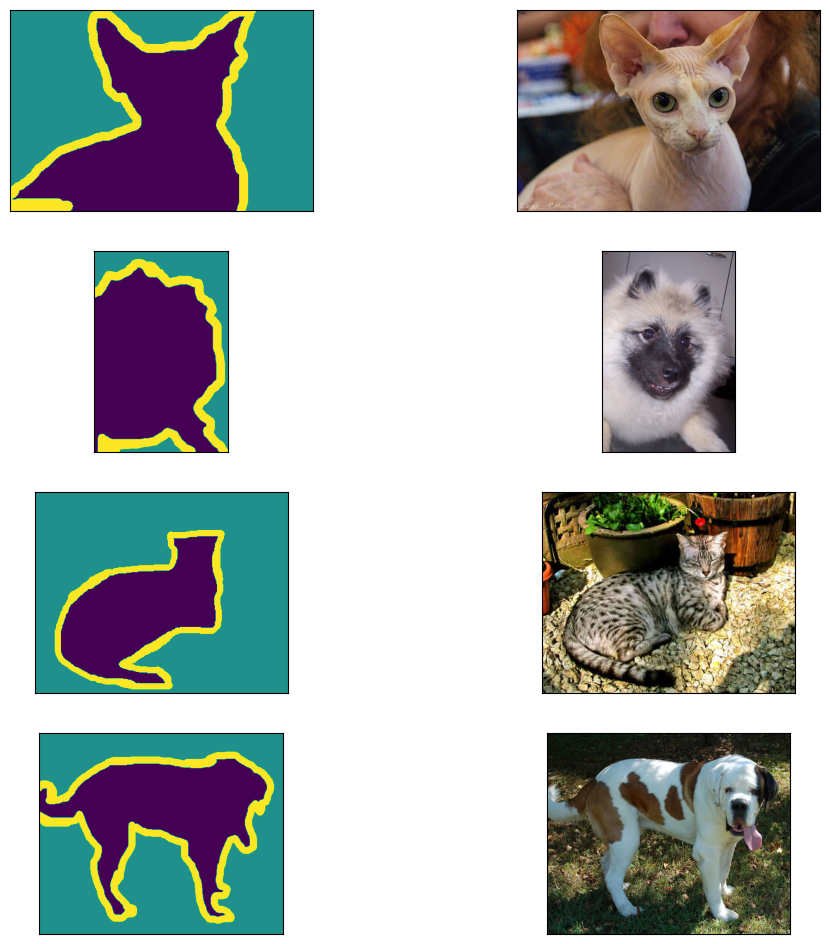

In [15]:
plt.figure(figsize=(12, 12))

for i in range(0, 4):
    index = random.randint(0, len(images) - 1)
    image_name = images[index]
    map_name = images[index].split('.')[0] + '.png'

    plt.subplot(4, 2, 1 + i*2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plt.imread(os.path.join(trimaps_dir, map_name)))
    plt.subplot(4, 2, 2 + i*2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plt.imread(os.path.join(image_dir, image_name)))
plt.show()

In [18]:
print("Trying to open:", img_path)

Trying to open: data/annotations/trimaps\._Abyssinian_1.png


In [19]:
with open(img_path, 'rb') as f:
    header = f.read(10)
print("File header (first 10 bytes):", header)

File header (first 10 bytes): b'\x00\x05\x16\x07\x00\x02\x00\x00Ma'


In [20]:
print(os.listdir(trimaps_dir)[:5]) 

['._Abyssinian_1.png', '._Abyssinian_10.png', '._Abyssinian_100.png', '._Abyssinian_101.png', '._Abyssinian_102.png']


In [21]:
for f in maps:
    try:
        img = Image.open(os.path.join(trimaps_dir, f))
        print(f, "loaded successfully")
        break
    except Exception as e:
        print(f, "failed:", e)

._Abyssinian_1.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_1.png'
._Abyssinian_10.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_10.png'
._Abyssinian_100.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_100.png'
._Abyssinian_101.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_101.png'
._Abyssinian_102.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_102.png'
._Abyssinian_103.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_103.png'
._Abyssinian_104.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_104.png'
._Abyssinian_105.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_105.png'
._Abyssinian_106.png failed: cannot identify image file 'data/annotations/trimaps\\._Abyssinian_106.png'
._Abyssinian_107.png failed: cannot identify image file 'data

In [22]:
maps = [
    f for f in os.listdir(trimaps_dir)
    if f.endswith('.png') and not f.startswith('._')
]

In [23]:
img_path = os.path.join(trimaps_dir, maps[0])
img = Image.open(img_path)
print(np.unique(img))

[1 2 3]


### Sagemaker Setup

In [28]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
import boto3

# If running inside SageMaker
try:
    role = sagemaker.get_execution_role()
except:
    # Fallback for local Jupyter or Colab
    role = 'arn:aws:iam::123456789012:role/service-role/AWSDeepRacerSageMakerAccessRole'

bucket_name = 'petsdata'
training_image = get_image_uri(boto3.Session().region_name, 'semantic-segmentation', repo_version='latest')


The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [29]:
print(training_image)

991648021394.dkr.ecr.ap-south-1.amazonaws.com/semantic-segmentation:1


In [30]:
folders = ['train', 'train_annotation', 'validation', 'validation_annotation']

for folder in folders:
    if os.path.isdir(folder):
        shutil.rmtree(folder)
    os.mkdir(folder)

In [32]:
def get_map_file(image):
    map_file = image.split('.')[0] + '.png'
    assert map_file in maps
    return map_file

for image in tqdm(images):
    target_set = 'train' if random.random() < 0.9 else 'validation'

    image_file_path = os.path.join('data/images/', image)
    image_target_path = os.path.join(target_set, image)

    map_file = get_map_file(image)
    map_file_path = os.path.join(trimaps_dir, map_file)
    map_target_path = os.path.join(target_set, 'annotation', map_file)

    # Ensure target folders exist
    os.makedirs(os.path.dirname(image_target_path), exist_ok=True)
    os.makedirs(os.path.dirname(map_target_path), exist_ok=True)

    shutil.copy(image_file_path, image_target_path)
    shutil.copy(map_file_path, map_target_path)


100%|██████████| 7390/7390 [07:31<00:00, 16.36it/s]


In [33]:
train_images = os.listdir('train')
train_annots = os.listdir('train_annotation')

In [34]:
print(len(train_images), len(train_annots))

6606 0
